In [176]:
import pandas as pd
from sklearn.model_selection import train_test_split
'''Pipeline: Combines preprocessing and modeling into one streamlined object so you can fit and predict in one go'''
from sklearn.pipeline import Pipeline
'''ColumnTransformer Applies different preprocessing steps to different columns'''
from sklearn.compose import ColumnTransformer
'''Scales numerical features to have a mean of 0 and standard deviation of 1.'''
from sklearn.preprocessing import StandardScaler
'''Fills missing values in data with the following strategies: 'mean', 'median', 'most_frequent' '''
from sklearn.impute import SimpleImputer
'''one hot encoder --Converts categorical features into binary vectors 0s and 1s'''
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
''' Implements a Support Vector Machine classifier'''
from sklearn.svm import SVC

In [178]:
dataset = pd.read_csv('./loan.csv')
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [180]:
X=dataset.drop(columns=['Loan_ID','Loan_Status'])
y=dataset['Loan_Status']

In [182]:
numeric_features=X.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [184]:
categorical_features=X.select_dtypes(include=['object']).columns.tolist()
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [216]:
y.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [186]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [188]:
#fill the missing value with median(middle value)(it is preferred when the data has outliers)
#after filling missing values scale them to have a mean of 0 and std deviation of 1

numeric_transform=Pipeline(steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
])

In [190]:
#fill the missing values with most frequent values in each categorical column
#converts each category into binary column(one-hot encoded)
#if any category is unkown it is ignored

categorical_transform=Pipeline(steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
                                 

In [192]:
X.columns.tolist()

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [194]:
#applies numeric transforms to the columns listed in numeric_features
#applies categorical transforms to the columns listed in categorical_features
preprocessor=ColumnTransformer(
        transformers=[
                ('num',numeric_transform,numeric_features),
                ('cat',categorical_transform,categorical_features)
                 ])

**preprocessor**

- Applies the ColumnTransformer which

- Imputes and scales numeric features

- Imputes and encodes categorical features

**SVC(kernel='linear')**

- Uses a Support Vector Classifier with a linear decision boundary

- Works well when your data is  linearly separable in the transformed feature space

In [196]:

clf=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',SVC(kernel='linear'))
])


In [200]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', SVC(kernel='linear'))])

In [202]:
score=clf.score(X_test,y_test)
print('accuracy',score)

accuracy 0.8536585365853658


In [219]:
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test,X_test_prediction)
test_data_accuracy

0.8536585365853658

In [206]:
cf=confusion_matrix(y_test,X_test_prediction)
cf

array([[21, 17],
       [ 1, 84]], dtype=int64)

In [208]:
clf.classes_

array(['N', 'Y'], dtype=object)

In [210]:
X_test.shape

(123, 11)

In [212]:
dataset['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

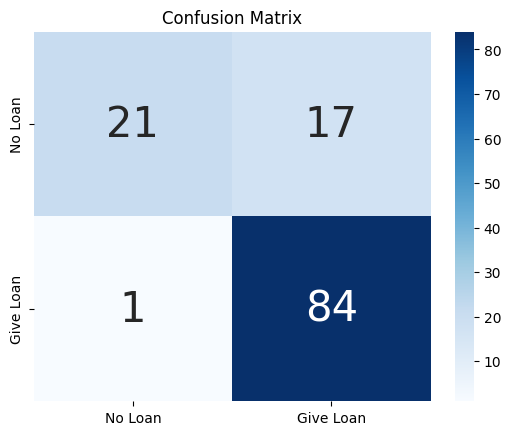

In [214]:
# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
ax = plt.axes()#Creates an axis on which we can draw our plot
df_cm = cf
'''ax=ax: Specifies the axis on which to draw the heatmap'''
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", xticklabels=['No Loan','Give Loan'], yticklabels=['No Loan','Give Loan'],ax = ax )
ax.set_title('Confusion Matrix')
plt.show()